In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.reset_default_graph()


height=28
width=28
channels=1
n_inputs=height*width

num_fil_conv1=32
ker_conv1=3
stride_conv1=1
pad_conv1='SAME'

num_fil_conv2=64
ker_conv2=3
stride_conv2=2
pad_conv2='SAME'

n_fc1=64
n_outputs=10

#placeholders
#intially the input is in flatten format
X=tf.placeholder(tf.float32,shape=[None,n_inputs],name='X')
X_reshape=tf.reshape(X,shape=[-1,height,width,channels])
Y=tf.placeholder(tf.int32,shape=[None],name='Y')

conv1=tf.layers.conv2d(X_reshape,filters=num_fil_conv1, kernel_size=ker_conv1,
                      strides=stride_conv1,padding=pad_conv1,activation=tf.nn.relu,name='Conv1')

conv2=tf.layers.conv2d(conv1,filters=num_fil_conv2, kernel_size=ker_conv2,
                      strides=stride_conv2,padding=pad_conv2,activation=tf.nn.relu,name='Conv2')

pool3=tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID',name='Pool3')
pool3_flat=tf.reshape(pool3,shape=[-1,num_fil_conv2*7*7])

fc1=tf.layers.dense(pool3_flat,n_fc1,activation=tf.nn.relu,name='fc1')

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_prob = tf.nn.softmax(logits, name="Y_prob")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=Y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, Y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))


with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()



In [3]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context


In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [5]:

n_epochs = 10
batch_size = 10

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, Y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, Y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, Y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "./mnist_model")

0 Train accuracy: 1.0 Test accuracy: 0.9832
1 Train accuracy: 1.0 Test accuracy: 0.986
2 Train accuracy: 1.0 Test accuracy: 0.9858
3 Train accuracy: 1.0 Test accuracy: 0.9879
4 Train accuracy: 1.0 Test accuracy: 0.9878
5 Train accuracy: 1.0 Test accuracy: 0.9895
6 Train accuracy: 1.0 Test accuracy: 0.988
7 Train accuracy: 1.0 Test accuracy: 0.9897
8 Train accuracy: 1.0 Test accuracy: 0.9879
9 Train accuracy: 1.0 Test accuracy: 0.9886


In [ ]:
#restoring Model

In [9]:
ckpt_dir='/Rahul/study/Research/Visualization/MNIST'

def get_activations(layer_name,image_2_feed):
    feed_img=np.reshape(image_2_feed,(1,784))
    
    with tf.Session() as sess:
        saver.restore(sess,os.path.join(ckpt_dir,"mnist_model"))
        activations=layer_name.eval(feed_dict={X: feed_img})
    return activations

#this function plots the original image and the feature_map
#Also, returns the activations value of all the feature maps in the layer
def plot_activations(layer_name,feature_map_index,image):
    original_img=image.copy()
    activations=get_activations(layer_name,image)
    num_filters=activations.shape[3]
#     print('max_number of feature_maps visualization available',num_filters)
    to_visualize=activations[0,:,:,feature_map_index]
    plt.subplot(121)
    plt.imshow(original_img.reshape((28,28)),cmap='gray')
    plt.title('Original_Image')
    plt.subplot(122)
    plt.imshow(to_visualize,cmap='gray')
    plt.title('Feature_Map')
    plt.show()
    return activations

    

INFO:tensorflow:Restoring parameters from /Rahul/study/Research/Visualization/MNIST/mnist_model


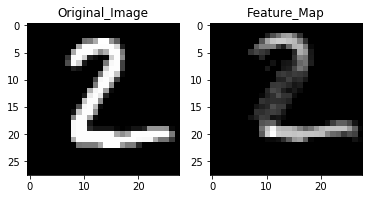

In [10]:
img_2_feed=mnist.test.images[1]
activations=plot_activations(layer_name=conv1,feature_map_index=31,image=img_2_feed)


INFO:tensorflow:Restoring parameters from /Rahul/study/Research/Visualization/MNIST/mnist_model


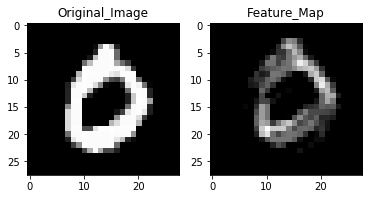

INFO:tensorflow:Restoring parameters from /Rahul/study/Research/Visualization/MNIST/mnist_model


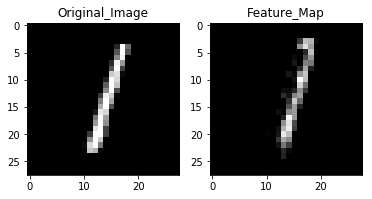

INFO:tensorflow:Restoring parameters from /Rahul/study/Research/Visualization/MNIST/mnist_model


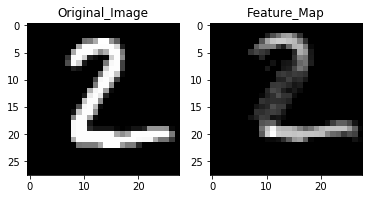

INFO:tensorflow:Restoring parameters from /Rahul/study/Research/Visualization/MNIST/mnist_model


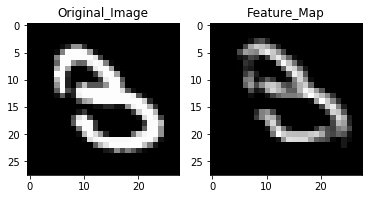

INFO:tensorflow:Restoring parameters from /Rahul/study/Research/Visualization/MNIST/mnist_model


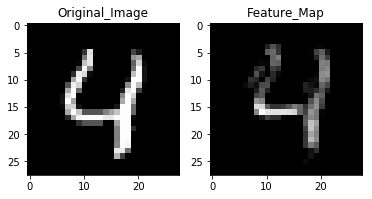

INFO:tensorflow:Restoring parameters from /Rahul/study/Research/Visualization/MNIST/mnist_model


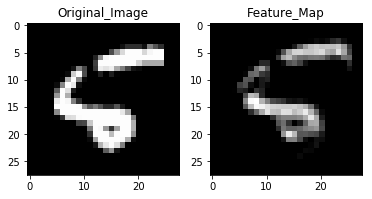

INFO:tensorflow:Restoring parameters from /Rahul/study/Research/Visualization/MNIST/mnist_model


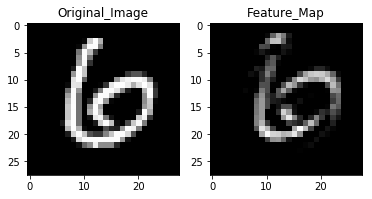

INFO:tensorflow:Restoring parameters from /Rahul/study/Research/Visualization/MNIST/mnist_model


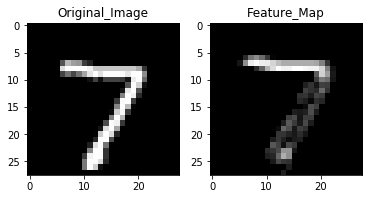

INFO:tensorflow:Restoring parameters from /Rahul/study/Research/Visualization/MNIST/mnist_model


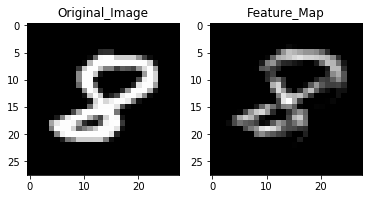

INFO:tensorflow:Restoring parameters from /Rahul/study/Research/Visualization/MNIST/mnist_model


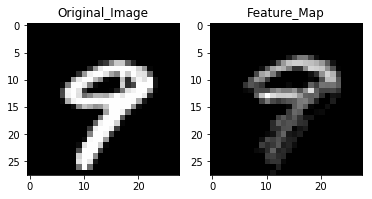

In [11]:
#plot the activation values of layer 1 and 2 for all the labels
label = [0,1,2,3,4,5,6,7,8,9]
index=[3,2,1,18,4,8,11,0,61,9]

label_plus_activation={}
for ind,val in enumerate(index):
    activation_digit=[]
    img_2_feed=mnist.test.images[val]
    activations=plot_activations(layer_name=conv1,feature_map_index=31,image=img_2_feed)
    for i in range(activations.shape[3]):
        activation_digit.append(np.sum(activations[0,:,:,i]))
    label_plus_activation[label[ind]]=activation_digit